# Prueba de hipótesis de dos grupos de medias

In [40]:
from symbulate import *
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib
import matplotlib.pyplot as plt

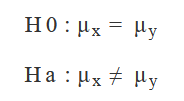

In [30]:
coca = pdr.get_data_yahoo('KO', start="01/01/2017", interval="d")
coca

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,41.810001,41.279999,41.500000,41.799999,14711000.0,34.991798
2017-01-04,41.970001,41.590000,41.880001,41.650002,9959400.0,34.866215
2017-01-05,41.860001,41.529999,41.660000,41.750000,8968300.0,34.949936
2017-01-06,41.810001,41.540001,41.700001,41.740002,10246600.0,34.941563
2017-01-09,41.580002,41.209999,41.230000,41.320000,14822500.0,34.589973
...,...,...,...,...,...,...
2022-08-10,63.790001,63.099998,63.630001,63.650002,8857300.0,63.650002
2022-08-11,63.990002,63.080002,63.689999,63.220001,8507800.0,63.220001
2022-08-12,63.759998,63.090000,63.430000,63.700001,9483700.0,63.700001


In [31]:
pepsi = pdr.get_data_yahoo('PEP', start="01/01/2017", interval="d")
pepsi

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,105.089996,104.209999,104.940002,104.650002,3741200.0,89.133141
2017-01-04,105.629997,104.790001,105.110001,104.849998,3029700.0,89.303497
2017-01-05,105.120003,104.190002,104.519997,104.709999,5087200.0,89.184280
2017-01-06,105.160004,104.120003,104.980003,104.559998,4109700.0,89.056511
2017-01-09,104.260002,103.250000,104.160004,103.459999,5603500.0,88.119598
...,...,...,...,...,...,...
2022-08-10,176.429993,174.720001,175.809998,175.940002,4041100.0,175.940002
2022-08-11,177.119995,174.669998,176.360001,175.039993,2743800.0,175.039993
2022-08-12,177.380005,175.380005,175.929993,177.330002,3756200.0,177.330002


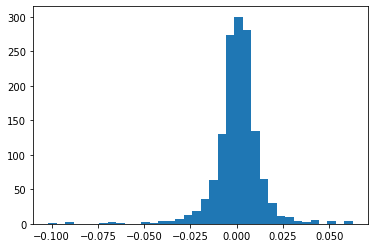

In [32]:
#Retorno continuo de coca
coca["r"] = np.log(coca['Adj Close']) - np.log(coca['Adj Close'].shift(1))
plt.hist(coca["r"], bins=36)
plt.show()

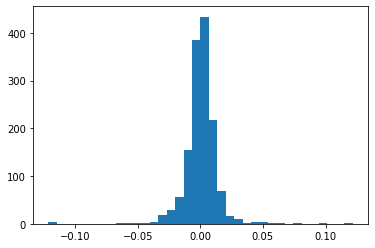

In [33]:
#Retorno continuo de pepsi
pepsi["r"] = np.log(pepsi['Adj Close']) - np.log(pepsi['Adj Close'].shift(1))
plt.hist(pepsi["r"], bins=36)
plt.show()

In [34]:
#Media
coca_mean = coca["r"].mean()
print("Media de coca:", coca_mean)
pepsi_mean = pepsi["r"].mean()
print("Media de pepsi:", pepsi_mean)

Media de coca: 0.0004382849932698836
Media de pepsi: 0.0004983040152898973


In [44]:
#Varianza
coca_var = coca["r"].var()
print("Varianza de coca:", coca_var)
pepsi_var = pepsi["r"].var()
print("Varianza de pepsi:", pepsi_var)

Varianza de coca: 0.00016294085339702368
Varianza de pepsi: 0.0001719912912926673


In [35]:
#Desviasión estándar
coca_std = coca["r"].std()
print("Desviación estándar de coca:", coca_std)
pepsi_std = pepsi["r"].std()
print("Desviasión estándar de pepsi:", pepsi_std)

Desviación estándar de coca: 0.01276482876489237
Desviasión estándar de pepsi: 0.01311454502804681


In [48]:
# t-value
t_value = (coca_mean - pepsi_mean) / math.sqrt((coca_var + pepsi_var) / coca["r"].count())
t_value
#Según el t_value arrojado en el código anterior, coca es 0.12 veces menor que pepsi.

-0.12332047931902335

# Nivel de confianza, error I y valor p
El nivel de confianza de una prueba está relacionado con el nivel de error de la prueba; para un nivel de confianza al 95% puede terminar en 5% errónea, y esto es error I.
El valor p es la probabilidad de que nos equivoquemos si rechazamos la hipótesis nula.
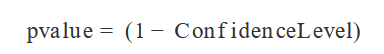

En donde el nivel de confianza se determina por el valor t.

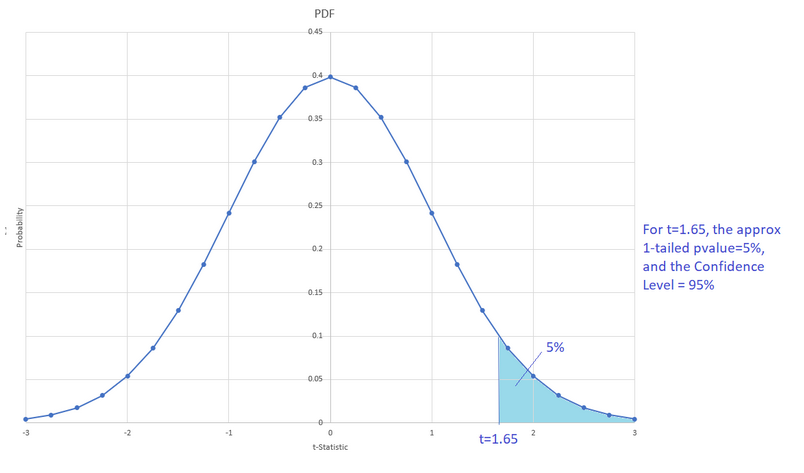

# CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?

In [49]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['AMD','INTC'],start="01/01/2017", end="08/15/2022",interval="m")
sprices=sprices['Adj Close']

In [50]:
# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()

In [51]:
# Stating the hypotheses: 
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calculating the standard error of the difference of the means:
N = sr['AMD'].count()
amdvar = sr['AMD'].var()
intelvar = sr['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (sr['AMD'].mean() - sr['INTC'].mean()) / sediff
t

1.4657496286047325

In [52]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.14608665604635424

In [53]:
# Using the ttest_ind function from stats:
st.ttest_ind(sr['AMD'],sr['INTC'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Ttest_indResult(statistic=1.4657496286047325, pvalue=0.14608665604635424)

In [57]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(sr['AMD'],sr['INTC'],equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

C:\Users\Keyuan\AppData\Local\Programs\Python\Python310\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0       AMD   67.0  0.033854  0.162034  0.019796  -0.005669  0.073378
 1      INTC   67.0  0.001877  0.075058  0.009170  -0.016431  0.020185
 2  combined  134.0  0.017866  0.126815  0.010955  -0.003803  0.039535,
                Welch's t-test  results
 0  Difference (AMD - INTC) =    0.0320
 1       Degrees of freedom =   93.8981
 2                        t =    1.4657
 3    Two side test p value =    0.1461
 4   Difference < 0 p value =    0.9270
 5   Difference > 0 p value =    0.0730
 6                Cohen's d =    0.2532
 7                Hedge's g =    0.2518
 8            Glass's delta =    0.1973
 9              Pearson's r =    0.1496)